In [ ]:
!pip install wandb
import wandb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00


In [1]:
import numpy as np
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [4]:
# Loading data

[(x_train, y_train), (x_test, y_test)] = fashion_mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2)

print("Size of Training data:", x_train.shape)
print("Size of Validation data:", x_val.shape)
print("Size of Training labels:", y_train.shape)
print("Size of Validation labels:", y_val.shape)
print("Size of Test data:", x_test.shape)
print("Size of Test labels:", y_test.shape)

# Performing Scaling transformations on the data
X_scaled = x_train / 255
X_val_scaled = x_val / 255
X_test_scaled = x_test / 255

X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1]*X_scaled.shape[2]).T
X_val_scaled = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1]*X_val_scaled.shape[2]).T
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1]*X_test_scaled.shape[2]).T

Size of Training data: (48000, 28, 28)
Size of Validation data: (12000, 28, 28)
Size of Training labels: (48000,)
Size of Validation labels: (12000,)
Size of Test data: (10000, 28, 28)
Size of Test labels: (10000,)


# Activation functions with its derivatives

In [ ]:
import numpy as np

class Sigmoid():
# Initialize the Sigmoid function with parameters c and b
    def __init__(self, c=1, b=0):
        self.c = c
        self.b = b

# Calculate the sigmoid function value for input x
    def value(self, x):
        fun_val = 1 + np.exp(-self.c * (x + self.b))
        return 1 / fun_val

    def diff(self, x, remove=False):
        y = self.value(x)
        if remove:
  # Remove the last element from the array
            y = y[:-1]
  # Calculate the derivative of the sigmoid function with respect to x
        fun_val = self.c * y * (1 - y)
        return fun_val


class Tanh():
    def __init__(self):
        pass

    def value(self, x):
       # tanh(z) = (e^z - e^(-z)) / (e^z + e^(-z))
        return np.exp(x) - np.exp(-x)/np.exp(x) + np.exp(-x)

    def der_tanh(self, x):
        y = self.value(x)
        fun_val = 1 - y**2 # 1 - tanh(z)^2
        return fun_val

class Relu():
    def __init__(self):
        pass

    def value(self, x):
      # ReLU function: f(x) = max(0, x)
        fun_val = x
        fun_val[fun_val<0] = 0
        return fun_val

    def diff(self, x):
      # Derivative of the ReLU function: 1 for x > 0, 0 for x <= 0
        fun_val = np.ones(x.shape)
        fun_val[fun_val<=0] = 0
        return fun_val

class Softmax():
    def __init__(self):
        pass

    def value(self, x):
        fun_val = np.exp(x)/np.sum(np.exp(x), axis=0)
        # print("X shape", x.shape, "Val shape", val.shape)
        return fun_val

    def diff(self, x):
        y = self.value(x)
        matrix = np.tile(y, y.shape[0])
        print(y.shape, matrix.shape)
        fun_val = np.diag(y.reshape(-1,)) -(matrix * matrix.T)
        return fun_val


# Loss functions with its derivatives

In [ ]:
# Class for Cross Entropy Loss
class cross_entropy():
    def __init__(self):
        pass

    # Function to calculate cross entropy loss
    def find_loss(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        loss_pq = -np.sum(np.sum(self.y_pred*np.log(self.y_true)))
        return loss_pq

    # Function to calculate the derivative of cross entropy
    def diff(self):
        grad = -self.y_pred/(self.y_true)
        return grad

# Class for Squared Error Loss
class Squared_Error():
    def __init__(self):
        pass

    # Function to calculate squared error loss
    def find_loss(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        loss = np.sum((y_pred-y_true)**2)
        return loss

    # Function to calculate the derivative of squared error loss
    def diff(self, y_true, y_pred):
        grad = -2*(y_true - y_pred)
        return grad


# One Hot Encoder and MiniMax Scalars

In [ ]:
class OneHotEncoder():
    def __init__(self):
        self.num_classes = None

    def fit_transform(self, y, num_classes=None):
        if num_classes is not None:
            self.num_classes = num_classes
        else:
            # Find unique classes in the target variable
            self.num_classes = len(np.unique(y))

        # Initialize a zero matrix (num_classes, number of samples)
        transformed = np.zeros((self.num_classes, len(y)))

        # Set the corresponding element to 1 for each sample
        for i, j in enumerate(y):
            transformed[j, i] = 1  # Fixed i, j to j, i

        return transformed

    def inverse_transform(self, y):
        # Inverse transform: find the class with the highest value in each column
        y_class = np.argmax(y, axis=0)
        return y_class

# Example usage
encoder = OneHotEncoder()

y = np.array([0, 1, 2, 0, 1])
# Fit and transform
encoded = encoder.fit_transform(y)
print("Encoded:\n", encoded)
# Inverse transform
decoded = encoder.inverse_transform(encoded)
print("Decoded:", decoded)

Encoded:
 [[1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]
Decoded: [0 1 2 0 1]


## Mini-MaxScaler

In [ ]:
# class MinMax_Scaler():
#     def __init__(self):
#         pass

#     def fit(self, X):
#         # Store the minimum and maximum values for each feature
#         self.min = np.min(X, axis=0)
#         self.max = np.max(X, axis=0)

#     def transform(self, X):
#         # Scale the data to the range [0, 1]
#         transformed = (X - self.min) / (self.max - self.min)
#         return transformed

#     def fit_transform(self, X):
#         self.fit(X)
#         return self.transform(X)

# scaler = MinMax_Scaler()
# # Sample data
# data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# # Fit and transform the data using the scaler
# scaled_data = scaler.fit_transform(data)

# # Display the original and scaled data
# print("Original data:\n", data)
# print("\nScaled data:\n", scaled_data)

Original data:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Scaled data:
 [[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


## Input and Dense layers

In [ ]:

# from activations import Sigmoid, Tanh, Relu, Softmax
Dic_activations = {"Sigmoid":Sigmoid(), "Tanh":Tanh(), "Relu":Relu(), "Softmax":Softmax()}

class Input_Layer():
  def __init__(self, data):
    self.name = "Input"
    self.input = data
    self.size = self.input.shape[0]

    # Having the input as the activated output to be given to the next layer
    self.a = self.input
    self.type = "Input layer"

  def __repr__(self):
    # Return a string representation of the Input layer
    representation = f"{self.type} - of Size: {self.size}"
    return representation

class Dense_Layer:
    def __init__(self, size, activation, name, last=False):
        # Initialize Dense layer with specified size, activation function, and name
        self.name = name
        self.size = size
        # Map activation function string to actual function
        self.activation = Dic_activations.get(activation)
        if self.activation is None:
            raise ValueError(f"Activation function '{activation}' not supported.")
        self.activation_name = activation
        self.type = "Dense layer"

    def __repr__(self):
        # Return a string representation of the Dense layer
        representation = f"{self.type} - of Size: {self.size}; Activation: {self.activation_name}"
        return representation

# Example
input_layer = Input_Layer(np.array([1, 2, 3]))
dense_layer = Dense_Layer(size=5, activation='Relu', name='hidden_layer')
print(input_layer)
print(dense_layer)

Input layer - of Size: 3
Dense layer - of Size: 5; Activation: Relu


## Stochastic gradient descent(SGD)

In [ ]:

# learning rate = alpha
class do_stochastic_gradient_descent():
    def __init__(self, alpha=0.01):
# Initialize the SGD object with a learning rate.
        self.update = 0
        self.alpha = alpha

    def set_params(self, params):
       # Set the parameters of the SGD object, such as the learning rate.
        for key in params:
            setattr(self, key, params[key])

    def get_update(self, gradient):
       # Calculate the update for the parameters based on the gradient and learning rate.
        self.update = self.alpha * gradient
        return self.update

# sgd = do_stochastic_gradient_descent(alpha=0.01)
# params = {'param1': 2.0, 'param2': -1.0}
# sgd.set_params(params)
# gradient = 1.5
# update = sgd.get_update(gradient)
# print(update)

## Momentum Stochastic Gradient Descent

In [ ]:

class do_momentum_stochastic_gradient_descent():
    def __init__(self, alpha=0.01, gamma=0.9):
       # Initialize the MomentumSGD with a learning rate (alpha) and momentum term (gamma).
        self.update = 0
        self.alpha = alpha
        self.gamma = gamma

    def set_params(self, params):
       # Set the parameters, such as learning rate and momentum(gamma).
        for key in params:
            setattr(self, key, params[key])

    def get_update(self, gradient):
        self.update = self.gamma * self.update + self.alpha * gradient
        return self.update


## Nesterov Accelerated Gradient (NAG)

In [ ]:
class do_nag():
    def __init__(self, alpha=0.001, gamma=0.9):
        self.update = 0
        self.alpha = alpha
        self.gamma = gamma

    def set_params(self, **kwargs):
        # Set the parameters of the NAG object, learning rate, and momentum term.
        for key, value in kwargs.items():
            setattr(self, key, value)

    def get_update(self, W, gradient):
        # Calculate the NAG update for the parameters based on the current parameters (W), gradient, and momentum term.
        W_lookahead = W - self.gamma * self.update

        grad_lookahead = gradient(W_lookahead)

        # Update the momentum term
        self.update = self.gamma * self.update + self.alpha * grad_lookahead

        # Update the parameters
        W = W - self.update

        return W


## Root Mean Square Propagation(RMSProp)

In [ ]:

class do_rmsprop():
    def __init__(self, gamma=0.9, alpha = 0.001, epsilon = 1e-8):
       # Initialize the RMSProp with a learning rate (alpha), decay rate (gamma), and epsilon.
        self.v = 0
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon

    def set_params(self, params):
       # Set the parameters of the RMSProp
        for key in params:
            setattr(self, key, params[key])

    def get_update(self, grad):

        self.v = self.gamma * self.v + (1 - self.gamma) * (grad ** 2)
        update = (self.alpha / (self.v + self.epsilon) ** 0.5) * grad

        return update

## Adam

In [ ]:
class do_adam():
    def __init__(self, beta1=0.9, beta2=0.99, alpha=0.001, epsilon=1e-8):
        # Initialize the Adam object with a learning rate (alpha), beta1, beta2, and epsilon.
        self.m = 0
        self.v = 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.alpha = alpha
        self.epsilon = epsilon
        self.iter = 1

    def set_params(self, params):
        # Set the parameters of the Adam
        for key in params:
            setattr(self, key, params[key])

    def get_update(self, grad):
        # Update the decaying average of the gradient and squared gradient
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grad ** 2)

        # Correct the bias of the decaying averages
        m_corrected = self.m / (1 - self.beta1 ** self.iter)
        v_corrected = self.v / (1 - self.beta2 ** self.iter)

        # Apply the update to the parameters directly
        update = self.alpha * m_corrected / (v_corrected + self.epsilon) ** 0.5
        self.iter += 1

        return update

## NAdam

In [ ]:
class do_nadam():
    def __init__(self, beta1=0.9, beta2=0.99, alpha=0.001, epsilon=1e-8):
        self.m = 0
        self.v = 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.alpha = alpha
        self.epsilon = epsilon
        self.iter = 1

    def set_params(self, params):
        for key in params:
            setattr(self, key, params[key])

    def get_update(self, grad):
        # Update the decaying average of the gradient and square gradient
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grad ** 2)

        # Correct the bias of the decaying averages
        m_corrected = self.m / (1 - self.beta1 ** self.iter)
        v_corrected = self.v / (1 - self.beta2 ** self.iter)

        # Calculate the NAG term using the updated m_corrected value
        nag_term = self.beta1 * m_corrected + ((1 - self.beta1) / (1 - self.beta1 ** self.iter)) * grad

        update = self.alpha * nag_term / (v_corrected + self.epsilon) ** 0.5
        self.iter += 1

        return update


In [ ]:
import math
from copy import deepcopy

from tqdm import tqdm


Dic_optimizers = {"SGD":do_stochastic_gradient_descent(), "Momentum_SGD":do_momentum_stochastic_gradient_descent(), "Nesterov":do_nag(), "RMS_Prop":do_rmsprop(), "Adam":do_adam(), "Nadam":do_nadam()}

Dic_losses = {"Squared_Error":Squared_Error(), "Cross_Entropy":cross_entropy()}

## FeedForward Neural Network

In [ ]:
class NeuralNetwork():
    def __init__(self, layers, batch_size, optimizer, initialization, epochs, t, loss, X_val=None, t_val=None, wandblogging=False, optim_params=None, learningrate = 0.01):

        self.layers = layers
        self.batch_size = batch_size
        self.optimizer = optimizer
        self.initialization = initialization
        self.epochs = epochs
        self.t = t
        self.batch_no = math.ceil(self.t.shape[1]/batch_size)
        self.loss_type = loss
        self.loss = Dic_losses[loss]
        self.wandblogging = wandblogging
        self.learningrate = learningrate

        if t_val is not None:
            self.X_val = X_val
            self.layers[0].a_val = X_val
            self.t_val = t_val


        #initalize optimizer
        self.param_init(optimizer, optim_params)

    def param_init(self, optimizer, params):
        prev_size = self.layers[0].size
        for layer in self.layers[1:]:
            # layer.Weights_size = (layer.size, size_prev+1)
            layer.Weights_size = (layer.size, prev_size)
            prev_size = layer.size



            # making use of optimizer data
            layer.Weights_optimizer = deepcopy(Dic_optimizers[optimizer])
            layer.Biases_optimizer = deepcopy(Dic_optimizers[optimizer])
            # Code to set params


            if params:
                layer.Weights_optimizer.set_params(params)
                layer.Biases_optimizer.set_params(params)

        if self.initialization == "random":
            for layer in self.layers[1:]:
                layer.Weights = np.random.normal(loc=0, scale=1.0, size = layer.Weights_size)
                layer.Biases = np.zeros((layer.Weights_size[0], 1))

        elif self.initialization == "xavier":
            for layer in self.layers[1:]:

                scale = 1/max(1., (2+2)/2.)
                limit = math.sqrt(3.0 * scale)
                layer.Weights = np.random.uniform(-limit, limit, size=layer.Weights_size)
                layer.Biases = np.zeros((layer.Weights_size[0], 1))


    def forward_propogation(self):
        for i in range(1, len(self.layers)):
            # print("Layer:", i, self.layers[i].W.shape)
            # Pre-activation
            self.layers[i].h = self.layers[i].Weights @ self.layers[i-1].a - self.layers[i].Biases
            # Activation
            self.layers[i].a = self.layers[i].activation.value(self.layers[i].h)
            # Validation
            self.layers[i].h_val = self.layers[i].Weights @ self.layers[i-1].a_val - self.layers[i].Biases
            self.layers[i].a_val = self.layers[i].activation.value(self.layers[i].h_val)

        if self.loss_type == "Cross_Entropy":
            # Final sofmax activation
            self.layers[-1].y = Softmax().value(self.layers[-1].a)
            self.layers[-1].y_val = Softmax().value(self.layers[-1].a_val)
        else:
            self.layers[-1].y = self.layers[-1].a
            self.layers[-1].y_val = self.layers[-1].a_val

    def check_test(self, X_test, t_test):
        self.layers[0].a_test = X_test
        for i in range(1, len(self.layers)):
            self.layers[i].h_test = self.layers[i].Weights @ self.layers[i-1].a_test - self.layers[i].Biases
            self.layers[i].a_test = self.layers[i].activation.value(self.layers[i].h_test)

        if self.loss=="Cross_Entropy":
            self.layers[-1].y_test = Softmax().value(self.layers[-1].a_test)
        else:
            self.layers[-1].y_test = self.layers[-1].a_test

        loss_test = self.loss.find_loss(t_test, self.layers[-1].y_test)

        encoder = OneHotEncoder()
        y_tmp = encoder.inverse_transform(self.layers[-1].y_test)
        t_tmp = encoder.inverse_transform(t_test)
        print("Shape of y_tmp:", y_tmp.shape)
        print("Shape of t_tmp:", t_tmp.shape)
        acc_test = np.sum(y_tmp == t_tmp)
        return acc_test, loss_test, y_tmp

###############################################################################################################


    def get_accuracy(self, validation=False, print_vals=False):
        encoder = OneHotEncoder()
        t_train = encoder.inverse_transform(self.t)
        y_train = encoder.inverse_transform(self.layers[-1].y)
        acc_train = np.sum(t_train==y_train)
        if print_vals:
            print("Train Accuracy:", acc_train)

        if validation:
            t_val = encoder.inverse_transform(self.t_val)
            y_val = encoder.inverse_transform(self.layers[-1].y_val)
            acc_val = np.sum(t_val==y_val)
            if print_vals:
                print("Validation Accuracy:", acc_val)
            return acc_train, acc_val
        return acc_train

    def backward_propogation(self):
        # Initialize variables neesed to keep track of loss
        self.eta_hist = []
        self.loss_hist = []
        self.accuracy_hist = []
        self.loss_hist_val = []
        self.accuracy_hist_val = []
        self.loss = Squared_Error()
        flag = 0

        # Perform Backprop
        # for _ in range(self.epochs):
        for ep in tqdm(range(self.epochs)):
            self.eta_hist.append(self.layers[-1].Weights_optimizer.alpha)
            self.loss_hist.append(self.loss.find_loss(self.t, self.layers[-1].y))
            train_acc, val_acc = self.get_accuracy(validation=True)
            self.accuracy_hist.append(train_acc)
            self.loss_hist_val.append(self.loss.find_loss(self.t_val, self.layers[-1].y_val))
            self.accuracy_hist_val.append(val_acc)

            if self.wandblogging:
                wandb.log({
                            "step": ep, \
                            "loss:": self.loss_hist[-1]/self.t.shape[1], \
                            "accuracy": self.accuracy_hist[-1]/self.t.shape[1], \
                            "val_loss": self.loss_hist_val[-1]/self.t_val.shape[1], \
                            "val_accuracy": self.accuracy_hist_val[-1]/self.t_val.shape[1]
                        })

            for batch in range(self.batch_no):
                # print("Batch:", batch)
                # X_batch = self.layers[0].input[batch*self.batch_size:(batch+1)*self.batch_size]
                t_batch = self.t[:, batch*self.batch_size:(batch+1)*self.batch_size]
                y_batch = self.layers[-1].y[:, batch*self.batch_size:(batch+1)*self.batch_size]
                self.y_batch = y_batch
                self.t_batch = t_batch

                # Calculate Loss, grad wrt y and softmax for last layer
                # print("t:\n", self.t)
                # print("y:\n", self.layers[-1].y)
                # print(self.loss_hist[-1])

                try:
                    if self.loss_hist[-1] > self.loss_hist[-2]:
                        for layer in self.layers[1:]:
                            layer.Weights_optimizer.set_params({"eta":self.optimizer.eta/2})
                            layer.b_optimizer.set_params({"eta":self.optimizer.eta/2})
                        flag = 1
                except:
                    pass

                if flag == 1:
                    break

                # self.layers[-1].cross_grad = self.loss.diff()
                self.layers[-1].a_grad = self.loss.diff(self.t_batch, self.y_batch)
                self.layers[-1].h_grad = self.layers[-1].a_grad * self.layers[-1].activation.diff(self.layers[-1].h[:, batch*self.batch_size:(batch+1)*self.batch_size])

                self.layers[-1].Weights_grad = self.layers[-1].h_grad @ self.layers[-2].a[:, batch*self.batch_size:(batch+1)*self.batch_size].T
                self.layers[-1].Weights_update = self.layers[-1].Weights_optimizer.get_update(self.layers[-1].Weights_grad)

                self.layers[-1].Biases_grad = -np.sum(self.layers[-1].h_grad, axis=1).reshape(-1,1)
                self.layers[-1].Biases_update = self.layers[-1].Biases_optimizer.get_update(self.layers[-1].Biases_grad)

                # print("Last Layer")
                # print("a_grad shape:", self.layers[-1].a_grad.shape)
                # print("h_grad shape:", self.layers[-1].h_grad.shape)
                # print("W_grad shape:", self.layers[-1].Weights_grad.shape)
                # print("W_update shape:", self.layers[-1].Weights_update.shape)
                # print("W_shape:", self.layers[-1].Weights.shape)
                # print("a_grad:\n", self.layers[-1].a_grad)
                # print("h_grad:\n", self.layers[-1].h_grad)
                # print("W_grad:\n", self.layers[-1].Weights_grad)

                assert self.layers[-1].Weights_update.shape == self.layers[-1].Weights.shape, "Sizes don't match"


                # Backpropogation for the remaining layers
                for i in range(len(self.layers[:-2]), 0, -1):
                    self.layers[i].a_grad = self.layers[i+1].Weights.T @ self.layers[i+1].h_grad
                    self.layers[i].h_grad = self.layers[i].a_grad * self.layers[i].activation.diff(self.layers[i].h[:, batch*self.batch_size:(batch+1)*self.batch_size])

                    self.layers[i].Biases_grad = -np.sum(self.layers[i].h_grad, axis=1).reshape(-1,1)
                    self.layers[i].Weights_grad = self.layers[i].h_grad @ self.layers[i-1].a[:, batch*self.batch_size:(batch+1)*self.batch_size].T

                    self.layers[i].Weights_update = self.layers[i].Weights_optimizer.get_update(self.layers[i].Weights_grad)
                    self.layers[i].Biases_update = self.layers[i].Biases_optimizer.get_update(self.layers[i].Biases_grad)

                # Update the weights
                for _, layer in enumerate(self.layers[1:]):
                    layer.Weights = layer.Weights - layer.Weights_update
                    layer.Biases = layer.Biases - layer.Biases_update


                self.forward_propogation()

            if flag == 1:
                break

In [ ]:
def Print_data(self):
        print("Model with the following layers:")
        for i in self.layers:
            print(i)
        print("Loss:", self.loss)
        print("Epochs:", self.epochs)
        print("Batch Size:", self.batch_size)
        print("Optimizer:", self.optimizer)
        print("Initialization:", self.initialization)

In [ ]:
def get_accuracy(self, validation=False, print_vals=False):
        encoder = OneHotEncoder()
        t_train = encoder.inverse_transform(self.t)
        y_train = encoder.inverse_transform(self.layers[-1].y)
        acc_train = np.sum(t_train==y_train)
        if print_vals:
            print("Train Accuracy:", acc_train)

        if validation:
            t_val = encoder.inverse_transform(self.t_val)
            y_val = encoder.inverse_transform(self.layers[-1].y_val)
            acc_val = np.sum(t_val==y_val)
            if print_vals:
                print("Validation Accuracy:", acc_val)
            return acc_train, acc_val
        return acc_train

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
print("Done!")

Done!


Done!


100%|██████████| 100/100 [00:04<00:00, 20.19it/s]


Shape of y_tmp: (500,)
Shape of t_tmp: (500,)
Shape of y_tmp: (10000,)
Shape of t_tmp: (10000,)
------------------------------------------------------------
Training Data
Fraction Correctly classified in untrained network: 0.105
Fraction Correctly classified in trained network: 0.3345
------------------------------------------------------------
Validation Data
Fraction Correctly classified in trained network: 0.318
------------------------------------------------------------
Testing Data
Fraction Correctly classified in trained network: 0.3077


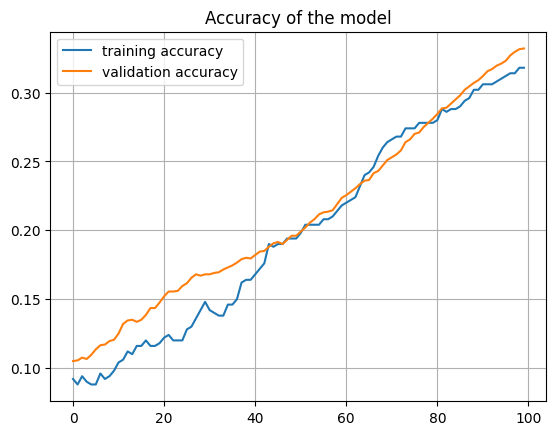

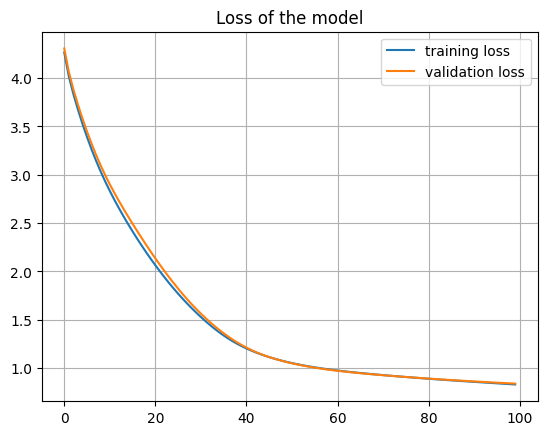

In [ ]:

Dic_optimizers = {"SGD":do_stochastic_gradient_descent(), "Momentum_SGD":do_momentum_stochastic_gradient_descent(), "Nesterov":do_nag(), "RMS_Prop":do_rmsprop(), "Adam":do_adam(), "Nadam":do_nadam()}

#################################################################
# Performing Scaling and Encoding transformations on the data

encoder = OneHotEncoder()
t = encoder.fit_transform(y_train, 10)
t_val = encoder.fit_transform(y_val, 10)
t_test = encoder.fit_transform(y_test, 10)
print("Done!")

X_scaled = X_scaled[:, :2000]
X_val_scaled = X_val_scaled[:, :500]
t = t[:,:2000]
t_val = t_val[:, :500]

#################################################################
layers = [Input_Layer(data=X_scaled),
          Dense_Layer(size=64, activation="Sigmoid", name="HL1"),
          Dense_Layer(size=10, activation="Sigmoid", name="OL")]

model = NeuralNetwork(layers=layers, batch_size=2000, optimizer="Nadam", \
                      initialization="random", loss="Squared_Error", \
                      epochs=int(100), t=t, X_val=X_val_scaled, t_val=t_val, \
                      wandblogging=False)

model.forward_propogation()
first_pass_y = model.layers[-1].y
model.backward_propogation()

acc_val, loss_val, _ = model.check_test(X_val_scaled, t_val)
acc_test, loss_test, _ = model.check_test(X_test_scaled, t_test)

print("-"*60)
print("Training Data")
print("Fraction Correctly classified in untrained network:", np.sum(np.argmax(first_pass_y, axis=0) == y_train[:2000])/2000)
print("Fraction Correctly classified in trained network:", np.sum(np.argmax((model.layers[-1].y), axis=0) == y_train[:2000])/2000)

print("-"*60)
print("Validation Data")
print("Fraction Correctly classified in trained network:", acc_val/t_val.shape[1])

print("-"*60)
print("Testing Data")
print("Fraction Correctly classified in trained network:", acc_test/t_test.shape[1])

#################################################################
plt.figure()
plt.plot(np.array(model.accuracy_hist_val)/500, label="training accuracy")
plt.plot(np.array(model.accuracy_hist)/2000, label="validation accuracy")
plt.title("Accuracy of the model")
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(np.array(model.loss_hist)/2000, label="training loss")
plt.plot(np.array(model.loss_hist_val)/500, label="validation loss")
plt.title("Loss of the model")
plt.legend()
plt.grid()
plt.show()


## Q.4

In [ ]:

# sweep_config = {"name": "complete-sweep", "method": "grid"}
# sweep_config["metric"] = {"name": "loss", "goal": "minimize"}

parameters_dict = {
    "num_epochs": {"values": [10, 50]},
    "num_hidden_layers": {"values": [3, 4, 5]},
    "size_hidden_layer": {"values": [32, 64, 128]},
    # "learning_rate": {"values": [1e-3, 1e-4]},
    "optimizer": {"values": ["SGD", "MomentumSGD", "RMSProp", "Adam", "Nadam"]},
    "batch_size": {"values": [128, 1024, 60000]},
    "weight_init": {"values": ["random", "xavier"]},
    "activation": {"values": ["Sigmoid", "Tanh", "Relu"]},
    "loss": {"values": ["Cross_Entropy", "Squared_Error"]},
}

# sweep_config["parameters"] = parameters_dict

# for i in sweep_config:
#     print(i, sweep_config[i])


# def train_Neural_Network(config = sweep_config):
def train_Neural_Network(config):
    print(config)
    # with wandb.init(project="Assignment1", entity="cs6910jananiteam", config=config):
    #     config = wandb.init().config
    #     wandb.run.name = "e_{}_hl_{}_opt_{}_bs_{}_init_{}_ac_{}_loss_{}".format(config.num_epochs,\
    #                                                                       config.size_hidden_layer,\
    #                                                                       config.optimizer,\
    #                                                                       config.batch_size,\
    #                                                                       config.weight_init,\
    #                                                                       config.activation,\
    #                                                                       config.loss)

    layers = [Input_Layer(data=X_scaled),
              Dense_Layer(size=config["size_hidden_layer"], activation=config["activation"], name="HL1"),
              Dense_Layer(size=10, activation=config["activation"], name="OL")]

    nn_model = NeuralNetwork(layers=layers, batch_size=config["batch_size"],
                             optimizer=config["optimizer"], initialization=config["weight_init"],
                             epochs=config["num_epochs"], t=t, X_val=X_val_scaled,
                             t_val=t_val, loss=config["loss"], wandblogging=True)#, \
                            #  optim_params={"eta":config.learning_rate})

    nn_model.forward_propogation()
    nn_model.backward_propogation()
    acc_val, loss_val, _ = nn_model.check_test(X_val_scaled, t_val)
    acc_test, loss_test, _ = nn_model.check_test(X_test_scaled, t_test)

    # wandb.log({"val_loss_end": loss_val/t_val.shape[1], \
    #             "val_acc_end": acc_val/t_val.shape[1], \
    #             "test_loss_end": loss_test/t_test.shape[1], \
    #             "test_acc_end": acc_test/t_test.shape[1], \
    #             "epoch":config.num_epochs})

# ####################################################################
# sweep_id = wandb.sweep(sweep_config, project = "Assignment1")
# wandb.agent(sweep_id, function = train_Neural_Network)
# #################################################################### [markdown]

name complete-sweep
method grid
metric {'name': 'loss', 'goal': 'minimize'}
parameters {'num_epochs': {'values': [10, 50]}, 'num_hidden_layers': {'values': [3, 4, 5]}, 'size_hidden_layer': {'values': [32, 64, 128]}, 'optimizer': {'values': ['SGD', 'MomentumSGD', 'RMSProp', 'Adam', 'Nadam']}, 'batch_size': {'values': [128, 1024, 60000]}, 'weight_init': {'values': ['random', 'xavier']}, 'activation': {'values': ['Sigmoid', 'Tanh', 'Relu']}, 'loss': {'values': ['Cross_Entropy', 'Squared_Error']}}


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Create sweep with ID: pg38l7lr
Sweep URL: https://wandb.ai/lokendrakumar/Assignment1/sweeps/pg38l7lr


wandb: Agent Starting Run: r5804u58 with config:
wandb: 	activation: Sigmoid
wandb: 	batch_size: 128
wandb: 	loss: Cross_Entropy
wandb: 	num_epochs: 10
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: SGD
wandb: 	size_hidden_layer: 32
wandb: 	weight_init: random


{'name': 'complete-sweep', 'method': 'grid', 'metric': {'name': 'loss', 'goal': 'minimize'}, 'parameters': {'num_epochs': {'values': [10, 50]}, 'num_hidden_layers': {'values': [3, 4, 5]}, 'size_hidden_layer': {'values': [32, 64, 128]}, 'optimizer': {'values': ['SGD', 'MomentumSGD', 'RMSProp', 'Adam', 'Nadam']}, 'batch_size': {'values': [128, 1024, 60000]}, 'weight_init': {'values': ['random', 'xavier']}, 'activation': {'values': ['Sigmoid', 'Tanh', 'Relu']}, 'loss': {'values': ['Cross_Entropy', 'Squared_Error']}}}


wandb: Currently logged in as: ma23m008. Use `wandb login --relogin` to force relogin
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


  0%|          | 0/10 [00:00<?, ?it/s]
wandb: ERROR Run r5804u58 errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/usr/local/lib/python3.10/dist-packages/wandb/agents/pyagent.py", line 308, in _run_job
wandb: ERROR     self._function()
wandb: ERROR   File "<ipython-input-80-82913d7de1ef>", line 45, in train_Neural_Network
wandb: ERROR     nn_model.backward_propogation()
wandb: ERROR   File "<ipython-input-73-22f538665ce0>", line 139, in backward_propogation
wandb: ERROR     wandb.log({
wandb: ERROR   File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/lib/preinit.py", line 36, in preinit_wrapper
wandb: ERROR     raise wandb.Error(f"You must call wandb.init() before {name}()")
wandb: ERROR wandb.errors.Error: You must call wandb.init() before wandb.log()
wandb: ERROR 
wandb: Ctrl + C detected. Stopping sweep.


In [ ]:
# Example configuration, replace this with your desired configuration
config = {
    "num_epochs": 10,
    "num_hidden_layers": 3,
    "size_hidden_layer": 64,
    "optimizer": "Adam",
    "batch_size": 128,
    "weight_init": "xavier",
    "activation": "Relu",
    "loss": "Cross_Entropy"
}

# Call the function with the specified configuration
train_nn(config)

{'num_epochs': 10, 'num_hidden_layers': 3, 'size_hidden_layer': 64, 'optimizer': 'Adam', 'batch_size': 128, 'weight_init': 'xavier', 'activation': 'Relu', 'loss': 'Cross_Entropy'}


100%|██████████| 10/10 [00:03<00:00,  3.23it/s]

Shape of y_tmp: (500,)
Shape of t_tmp: (500,)
Shape of y_tmp: (10000,)
Shape of t_tmp: (10000,)


## Q.7

In [ ]:
# sweep_config = {"name": "best-sweep", "method": "grid"}
# sweep_config["metric"] = {"name": "loss", "goal": "minimize"}

parameters_dict = {
    "num_epochs": {"values": [1]},
    "size_hidden_layer": {"values": [64]},
    "optimizer": {"values": ["Adam"]},
    "batch_size": {"values": [128]},
    "weight_init": {"values": ["xavier"]},
    "activation": {"values": ["Sigmoid"]},
    "loss": {"values": ["Cross_Entropy"]},
}

# Commented out sweep_config and parameters assignment
# sweep_config["parameters"] = parameters_dict

y_test_pred = 0

# Removed wandb related code
def train_nn(config):
    print(config)
    global y_test_pred

    layers = [Input_Layer(data=X_scaled),
              Dense_Layer(size=config['size_hidden_layer'], activation=config['activation'], name="HL1"),
              Dense_Layer(size=10, activation=config['activation'], name="OL")]

    New_model = NeuralNetwork(layers=layers, batch_size=config['batch_size'],
                             optimizer=config['optimizer'], initialization=config['weight_init'],
                             epochs=config['num_epochs'], t=t, X_val=X_val_scaled,
                             t_val=t_val, loss=config['loss'], wandblogging=True)

    New_model.forward_propogation()
    first_pass_y = New_model.layers[-1].y
    New_model.backward_propogation()
    acc_val, loss_val, _ = New_model.check_test(X_val_scaled, t_val)
    acc_test, loss_test, y_test_pred = New_model.check_test(X_test_scaled, t_test)

    # Removed wandb.log and wandb related code

    cf_matrix = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cf_matrix)
    plt.title("Confusion Matrix")

    data = [[x, y] for (x, y) in zip(y_test, y_test_pred)]

    return

    # Removed wandb.Table and wandb.sklearn.plot_confusion_matrix related code
    # print(y_test.shape, y_test_pred.shape)
    # test_images = X_test_scaled[y_test == y_test_pred]

# Commented out sweep_id and wandb.agent related code
# sweep_id = wandb.sweep(sweep_config, project="Assignment1")
# wandb.agent(sweep_id, function=train_nn)


        # wandb.log({"conf_mat" : wandb.plot.confusion_matrix(
        #                 probs=None,
        #                 y_true=y_test[:9000],
        #                 preds=y_test_pred,
        #                 class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"])})


# sweep_id = wandb.sweep(sweep_config, project = "Assignment1")
# wandb.agent(sweep_id, function = train_nn)
#################################################################### [markdown]

{'num_epochs': 100, 'size_hidden_layer': 64, 'optimizer': 'Adam', 'batch_size': 512, 'weight_init': 'xavier', 'activation': 'Sigmoid', 'loss': 'Cross_Entropy'}


100%|██████████| 100/100 [00:10<00:00,  9.24it/s]


Shape of y_tmp: (500,)
Shape of t_tmp: (500,)
Shape of y_tmp: (10000,)
Shape of t_tmp: (10000,)


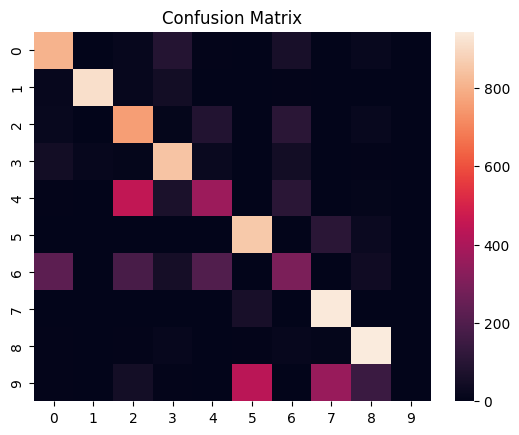

In [ ]:
# Sample configuration, replace it with the desired values
config = {
    "num_epochs": 100,
    "size_hidden_layer": 64,
    "optimizer": "Adam",
    "batch_size": 512,
    "weight_init": "xavier",
    "activation": "Sigmoid",
    "loss": "Cross_Entropy",
}

# Call the train_nn function with the configuration
train_nn(config)

## Q.10

In [ ]:

from keras.datasets import fashion_mnist, mnist

print("Loading data... ", end="")
[(x_train, train_y_labels), (x_test, test_y_labels)] = mnist.load_data()
x_train, x_val, train_y_labels, val_y_labels = train_test_split(x_train, train_y_labels, test_size=0.2, random_state=2)

print("Size of Training data:", x_train.shape)
print("Size of Validation data:", x_val.shape)

print("Performing Scaling and Encoding transformations on the data... ", end="")

normalizedX = x_train / 255
normalized_xval = x_val / 255
normalized_xtest = x_test / 255

normalizedX = normalizedX.reshape(normalizedX.shape[0], normalizedX.shape[1]*normalizedX.shape[2]).T
normalized_xval = normalized_xval.reshape(normalized_xval.shape[0], normalized_xval.shape[1]*normalized_xval.shape[2]).T
normalized_xtest = normalized_xtest.reshape(normalized_xtest.shape[0], normalized_xtest.shape[1]*normalized_xtest.shape[2]).T

encoder = OneHotEncoder()
t = encoder.fit_transform(y_train, 10)
t_val = encoder.fit_transform(y_val, 10)
t_test = encoder.fit_transform(y_test, 10)
print("Done!")



normalizedX = normalizedX
normalized_xval = normalized_xval
t = t
t_val = t_val


#################################################################
layers = [Input_Layer(data = normalizedX),
          Dense_Layer(size=128, activation="Relu", name="HiddenLayer1"),
          Dense_Layer(size=128, activation="Relu", name="HiddenLayer2"),
          Dense_Layer(size=128, activation="Relu", name="HiddenLayer2"),
          Dense_Layer(size=10, activation="Sigmoid", name="OutputLayer")]

DLModel = NeuralNetwork(layers=layers, batch_size=128, optimizer="Nadam", \
                      initialization="xavier", loss="Cross_Entropy", \
                      epochs=int(10), t=t, X_val=normalized_xval, t_val=t_val, \
                      wandblogging=False)

DLModel.forward_propogation()
SinglePass = DLModel.layers[-1].y
DLModel.backward_propogation()


#################################################################


acc_val, loss_val, _ = DLModel.TestingData(normalized_xval, t_val)
acc_test, loss_test, _ = DLModel.TestingData(normalized_xtest, t_test)

print('-------------------------------')
print("Training Data")
print("Fraction Correctly classified in untrained network:", np.sum(np.argmax(SinglePass, axis=0) == train_y_labels[:2000])/2000)
print("Fraction Correctly classified in trained network:", np.sum(np.argmax((DLModel.layers[-1].y), axis=0) == train_y_labels[:2000])/2000)

print('-------------------------------')
print("Validation Data")
print("Fraction Correctly classified in trained network:", acc_val/t_val.shape[1])

print('-------------------------------')
print("Testing Data")
print("Fraction Correctly classified in trained network:", acc_test/t_test.shape[1])

#################################################################
plt.figure()
plt.plot(np.array(DLModel.accuracy_hist_val)/500, label="training accuracy")
plt.plot(np.array(DLModel.accuracy_hist)/2000, label="validation accuracy")
plt.title("Accuracy of the model")
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(np.array(DLModel.loss_hist)/2000, label="training loss")
plt.plot(np.array(DLModel.loss_hist_val)/500, label="validation loss")
plt.title("Loss of the model")
plt.legend()
plt.grid()
plt.show()

Loading data... Size of Training data: (48000, 28, 28)
Size of Validation data: (12000, 28, 28)
Performing Scaling and Encoding transformations on the data... Done!


  0%|          | 0/10 [02:51<?, ?it/s]


KeyboardInterrupt: 